In [2]:
import math
import data
import random
import plotly.express as px

### Part 2: Scalar backpropagation

##### Question 3

In [ ]:
def forward_pass(W, V, X, t_index, b, c):
    k, h = [0., 0., 0.], [0., 0., 0.]
    o, y = [0., 0.], [0., 0.]
    
    # linear
    for j in range(3):
        for i in range(2):
            k[j] += W[i][j] * X[i]
        k[j] += b[j]

    # sigmoid activation
    for i in range(3):
        h[i] = (1+math.exp(-k[i]))**(-1)

    # linear
    for i in range(2):
        for j in range(3):
            o[i] += h[j] * V[j][i]
        o[i] += c[i]

    #softmax activation
    sum_exp_output = sum([math.exp(output) for output in o])
    for i in range(2):
        y[i] = math.exp(o[i])/ sum_exp_output

    # compute loss
    loss = (-1*math.log(y[t_index]))

    context = W, V, X, t_index, b, c, k, h, o, y
    return loss, context

In [ ]:
def backward_pass(context, alpha=0.01):
    W, V, X, t_index, b, c, k, h, o, y = context
    dy, do = [0., 0.], [0., 0.]
    dV, dW = [[0., 0.], [0., 0.], [0., 0.]], [[0., 0. , 0.], [0., 0., 0.]]
    dh, dk = [0. , 0., 0.], [0. , 0., 0.]
    db = [0., 0., 0.]

    # compute d(Loss)/dy[i]
    for i in range(2):
        if i == t_index: dy[i] = -1/y[i]
        else: dy[i] = 0

    # compute d(Loss)/do[i]
    for i in range(2):
        for j in range(2):
            if i != j and i == t_index:
                do[j] += dy[i]*(-1)*y[i]*y[j]
            elif i == j and i == t_index:
                do[j] += dy[i]*y[i]*(1-y[i])
            elif i != t_index:
                do[j] += 0

    # compute d(Loss)/dV[j][i] and d(Loss)/dh[i]
    for i in range(2):
        for j in range(3): 
            dV[j][i] = do[i]*h[j]
            dh[j] += do[i]*V[j][i]
    dc = do

    # compute d(Loss)/dk[i]
    for j in range(3):
        dk[j] = dh[j] * h[j] * (1-h[j])

    # compute d(Loss)/dW[i][j] and d(Loss)/db[j]
    for j in range(3):
        for i in range(2):
            dW[i][j] = dk[j] * X[i]
        db[j] = dk[j]

    # update W and b parameters
    for j in range(3):
        for i in range(2):
            W[i][j] += -alpha*dW[i][j]
        b[j] += -alpha*db[j]

    # update V and c parameters
    for i in range(2):
        for j in range(3): 
            V[j][i] += -alpha*dV[j][i]
        c[i] += -alpha*dc[i]

    results = W, V, b, c
    gradients = dy, do, dh, dk, dV, dW, db, dc
    return gradients, results

In [ ]:
## Test forward pass
W, V= [[1.,1.,1.], [-1,-1,-1]], [[1.,1.], [-1.,-1.], [-1., -1.]]
b, c = [0, 0, 0], [0, 0]
X, t = [1, -1], 0
loss = 0

loss, context = forward_pass(W, V, X, t, b, c)
print("Loss: ", loss)

## Test backward pass
gradients, results = backward_pass(context)
dy, do, dh, dk, dV, dW, db, dc = gradients

print("Gradient of W: ", dW)
print("Gradient of b: ", db)
print("Gradient of V: ", dV)
print("Gradient of c: ", dc)

print(results)

Loss:  0.6931471805599453
Gradient of W:  [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
Gradient of b:  [0.0, 0.0, 0.0]
Gradient of V:  [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
Gradient of c:  [-0.5, 0.5]
([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]], [[1.0044039853898894, 0.9955960146101106], [-0.9955960146101106, -1.0044039853898894], [-0.9955960146101106, -1.0044039853898894]], [0.0, 0.0, 0.0], [0.005, -0.005])


##### Question 4

In [ ]:
(xtrain, ytrain), (xval, yval), num_cls = data.load_synth()

In [ ]:
ytrain.shape

(60000,)

In [ ]:
def initialize_weights(is_random=True):
    r = random.gauss # mu=0 and sigma=1
    if not is_random:
        W, V= [[1.,1.,1.], [-1,-1,-1]], [[1.,1.], [-1.,-1.], [-1., -1.]]
        b, c = [0, 0, 0], [0, 0]
    else:
        W, V= [[r(0,1),r(0,1),r(0,1)], [r(0,1),r(0,1),r(0,1)]], [[r(0,1),r(0,1)], [r(0,1),r(0,1)], [r(0,1),r(0,1)]]
        b, c = [0, 0, 0], [0, 0]
    
    return W, V, b, c

In [ ]:
def calculate_accuracy():
  pass

In [ ]:
W, V, b, c = initialize_weights(is_random=True)

# save loss values for train and validation
avg_loss_train, avg_loss_val = [], []
loss_train_epoch1, loss_val_epoch1 = [], []
epochs = 10
alpha = 0.01 # learning rate

# loss_train_epoch1, loss_val_epoch1 = [], []

for epoch in range(epochs):
    # train data
    loss_train, loss_val = [], []
    for X, t_index in zip(xtrain, ytrain): 
        loss, context = forward_pass(W, V, list(X), t_index, b, c)
        
        gradients, results = backward_pass(context, alpha)
        W, V, b, c  = results

        loss, context = forward_pass(W, V, list(X), t_index, b, c)
        loss_train.append(loss)

    # validation data
    for X, t_index in zip(xval, yval): 
        loss, context = forward_pass(W, V, list(X), t_index, b, c)
        loss_val.append(loss)
    
    # if epoch==1:
    #   loss_train_epoch1 = loss_train
    #   loss_val_epoch1 = loss_val

    avg_loss_train.append(sum(loss_train)/len(loss_train))
    avg_loss_val.append(sum(loss_val)/len(loss_val))


In [ ]:
import pandas as pd

avg_loss = []
vector_epochs = [i for i in range(len(avg_loss_train))]
avg_loss += avg_loss_train
name = ['train' for _ in range(len(avg_loss_train))]
vector_epochs += [i for i in range(len(avg_loss_val))]
avg_loss += avg_loss_val
name += ['val' for _ in range(len(avg_loss_val))]

df = pd.DataFrame({'epochs': vector_epochs,'SGD Average loss per epoch': avg_loss, 'name': name})
fig = px.line(df, x='epochs', y='SGD Average loss per epoch', color='name', markers=True, width=600, height=400)
fig.show()

In [ ]:
# samples = [i for i in range(len(loss_train_epoch1))]
# loss_epoch1 = loss_train_epoch1
# name = ['train' for _ in range(len(loss_train_epoch1))]

# df = pd.DataFrame({'samples': samples,'loss_epoch1': loss_epoch1, 'name': name})
# fig = px.line(df, x='samples', y='loss_epoch1', color='name', markers=True)
# fig.show()

### Part 3: Tensor backpropagation

##### *Helper Functions*

In [3]:
import numpy as np
from tqdm.auto import tqdm 

In [4]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def normalize_data(dataset):
    return (dataset - dataset.min()) / (dataset.max() - dataset.min())

def standardize_data(dataset):
    return (dataset - dataset.mean()) / dataset.std()

def initialize_weights_vector(input_size, nr_classes=10, nr_hlayers=300):
    W = np.random.normal(0, 1, size=(input_size, nr_hlayers))
    V = np.random.normal(0, 1, size=(nr_hlayers, nr_classes))
    b, c = np.array([0.] * nr_hlayers), np.array([0.] * nr_classes)

    return W, V, b, c

def convert_onehotencoding(y, t_index):
    # https://stackoverflow.com/questions/29816117/numpy-set-one-specific-element-of-each-column-based-on-indexing-by-array
    t = np.zeros(y.shape)
    t[np.arange(y.shape[0]), t_index] = 1
    return t

##### Question 5

In [5]:
(x_train, y_train), (x_val, y_val), num_mcls = data.load_mnist()

Download complete.
Save complete.


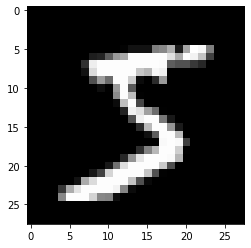

In [6]:
# visualize the data
import matplotlib.pyplot as plt

img = x_train[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

**Network Vectorized**

In [32]:
def update_weights(W, V, b, c, gradients, alpha=0.01):
    dV, dW, db, dc = gradients
    W = W - alpha*dW
    b = b - alpha*db
    V = V - alpha*dV
    c = c - alpha*dc

    return W, V, b, c

def compute_loss_acc(y, t_index):
    # pick the y value that corresponds to y_c
    loss = np.mean(-np.log(y[np.arange(y.shape[0]), t_index]))
    preds = list(np.argmax(y, axis=1))
    accuracy = np.mean(preds == t_index)
    return loss, accuracy

def forward_pass_vectorized(X, W, V, b, c):
    # linear
    k = np.dot(X, W) + b

    # sigmoid activation
    h = sigmoid(k)

    # linear
    o = np.dot(h, V) + c

    # softmax activation
    exp_o = np.exp(o)
    y = exp_o/np.sum(exp_o, axis=1, keepdims=True)

    context = k, h, o, y
    return context

def backward_pass_vectorized(X, t_index, V, context):
    k, h, o, y = context

    # compute d(Loss)/do[i]
    # https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/
    t = convert_onehotencoding(y, t_index)
    do = (y-t)

    # compute d(Loss)/dV[j][i] and d(Loss)/dh[i]
    dV = (h.T) @ do
    dh = do @ V.T
    dc = np.sum(do, axis=0)

    # compute d(Loss)/dk[i]
    dk = np.multiply(np.multiply(dh, h), (1-h))

    # compute d(Loss)/dW[i][j] and d(Loss)/db[j]
    dW = X.T @ dk
    db = np.sum(dk, axis=0)

    return dV, dW, db, dc

In [36]:
# Test vectorized version
W, V= np.array([[1.,1.,1.], [-1,-1,-1]]), np.array([[1.,1.], [-1.,-1.], [-1., -1.]])
b, c = np.array([0, 0, 0]), np.array([0, 0])
X, t_index = np.array([[1, -1]]), np.array([0])

context = forward_pass_vectorized(X, W, V, b, c)
gradients = backward_pass_vectorized(X, t_index, V, context)

(W, V, b, c) = update_weights(W, V, b, c, gradients)

# loss and accuracy for batch data
context = forward_pass_vectorized(X, W, V, b, c)
_, _, _, pred = context
loss, acc = compute_loss_acc(pred, t_index)

print('Loss: ', loss)
print('Accuracy: ', acc)

print("Gradient of W: ", dW)
print("Gradient of b: ", db)
print("Gradient of V: ", dV)
print("Gradient of c: ", dc)

print('W, V, b, c', W, V, b, c)
#([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]], [[1.0044039853898894, 0.9955960146101106], [-0.9955960146101106, -1.0044039853898894], [-0.9955960146101106, -1.0044039853898894]], [0.0, 0.0, 0.0], [0.005, -0.005])


Loss:  0.6766485175434298
Accuracy:  1.0
Gradient of W:  [[0. 0. 0.]
 [0. 0. 0.]]
Gradient of b:  [0. 0. 0.]
Gradient of V:  [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
Gradient of c:  [-0.5  0.5]
W, V, b, c [[ 1.  1.  1.]
 [-1. -1. -1.]] [[ 1.00440399  0.99559601]
 [-0.99559601 -1.00440399]
 [-0.99559601 -1.00440399]] [0. 0. 0.] [ 0.005 -0.005]


##### Question 6

In [42]:
# train data
def train(x_train, t_index, x_val, t_val, num_mcls, nr_hlayers, epochs, alpha, batch_size=1):
    (W, V, b, c) = initialize_weights_vector(x_train.shape[1], nr_classes=num_mcls, nr_hlayers=nr_hlayers)

    # In this case mini batch becomes same as batch gradient descent
    if batch_size > x_train.shape[0]:
        batch_size = x_train.shape[0]

    num_batches = round(x_train.shape[0] / batch_size)
    batches, y_batches = np.array_split(x_train, num_batches), np.array_split(t_index, num_batches)

    epochs_loss_train, epochs_loss_val, epochs_batch_loss = [], [], []
    epochs_acc_train, epochs_acc_val, epochs_batch_acc = [], [], []

    for epoch in tqdm(range(epochs), desc='epochs'):
        for (batch_X, batch_t_index) in tqdm(zip(batches, y_batches), total=len(y_batches), desc='train', position=0):
            context = forward_pass_vectorized(batch_X, W, V, b, c)
            gradients = backward_pass_vectorized(batch_X, batch_t_index, V, context)

            (W, V, b, c) = update_weights(W, V, b, c, gradients, alpha=alpha)

            # loss and accuracy for batch data
            context = forward_pass_vectorized(batch_X, W, V, b, c)
            _, _, _, pred = context
            loss, acc = compute_loss_acc(pred, batch_t_index)
            epochs_batch_loss.append(loss)
            epochs_batch_acc.append(acc)

        # train
        context = forward_pass_vectorized(x_train, W, V, b, c)
        _, _, _, pred_train = context
        loss_train, acc_train = compute_loss_acc(pred_train, t_index)
        epochs_loss_train.append(loss_train)
        epochs_acc_train.append(acc_train)

        # validation
        context = forward_pass_vectorized(x_val, W, V, b, c)
        _, _, _, pred_val = context
        loss_val, acc_val = compute_loss_acc(pred_val, t_val)
        epochs_loss_val.append(loss_val)
        epochs_acc_val.append(acc_val)

        print("Epoch {}: Train Loss: {} - Train Accuracy: {}".format(
            epoch, round(epochs_loss_train[epoch], 5), round(epochs_acc_train[epoch], 5)))
        print("Epoch {}: Validation Loss: {} - Validation Accuracy: {}".format(
            epoch, round(epochs_loss_val[epoch], 5), round(epochs_acc_val[epoch], 5)))

    return epochs_loss_train, epochs_acc_train, \
           epochs_loss_val, epochs_acc_val, \
           epochs_batch_loss, epochs_batch_acc

In [64]:
def run(dataset, alpha, batch_size, nr_hlayers=300, epochs=5):
    (x_train, y_train), (x_val, y_val), num_mcls = dataset
    x_train, x_val = normalize_data(x_train), normalize_data(x_val) # normalize data

    epochs_loss_train, epochs_acc_train, \
        epochs_loss_val, epochs_acc_val, \
        epochs_batch_loss, epochs_batch_acc = \
        train(x_train, y_train, x_val, y_val, num_mcls, nr_hlayers, epochs, alpha, batch_size)

    # plot_diagrams(epochs_loss_train, epochs_acc_train,
    #               epochs_loss_val, epochs_acc_val,
    #               epochs_batch_loss, epochs_batch_acc)
    
    print("Final Train Loss: {} - Final Train Accuracy: {}".format(
        round(epochs_loss_train[-1], 5), round(epochs_acc_train[-1], 5)))
    print("Final Validation Loss: {} - Final Validation Accuracy: {}".format(
        round(epochs_loss_val[-1], 5), round(epochs_acc_val[-1], 5)))
    
    return (epochs_loss_train, epochs_acc_train, \
        epochs_loss_val, epochs_acc_val, \
        epochs_batch_loss, epochs_batch_acc)

In [65]:
dataset = data.load_mnist()
(x_train, y_train), (x_val, y_val), num_mcls = dataset

results = run(dataset, alpha=0.01, batch_size=512)

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/107 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.39955 - Train Accuracy: 0.88836
Epoch 0: Validation Loss: 0.33419 - Validation Accuracy: 0.906


train:   0%|          | 0/107 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.27841 - Train Accuracy: 0.91835
Epoch 1: Validation Loss: 0.25502 - Validation Accuracy: 0.9274


train:   0%|          | 0/107 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.22197 - Train Accuracy: 0.93475
Epoch 2: Validation Loss: 0.21894 - Validation Accuracy: 0.9378


train:   0%|          | 0/107 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.18682 - Train Accuracy: 0.94502
Epoch 3: Validation Loss: 0.19821 - Validation Accuracy: 0.9442


train:   0%|          | 0/107 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.16209 - Train Accuracy: 0.95229
Epoch 4: Validation Loss: 0.18455 - Validation Accuracy: 0.9484
Final Train Loss: 0.16209 - Final Train Accuracy: 0.95229
Final Validation Loss: 0.18455 - Final Validation Accuracy: 0.9484


In [117]:
import pandas as pd

def plot_diagrams(epochs_loss_train, epochs_acc_train,
                  epochs_loss_val, epochs_acc_val, 
                  epochs_batch_loss=[], epochs_batch_acc=[], size=None):
  if size is None: size = len(epochs_loss_train)
  batches = round(len(epochs_batch_loss)/size)
  batch_list = [[i]*batches for i in range(size)]
  batch_list = [item for sublist in batch_list for item in sublist]
    
  loss = epochs_loss_train + epochs_loss_val + epochs_batch_loss
  acc = epochs_acc_train + epochs_acc_val + epochs_batch_acc
  vector_epochs = [i for i in range(len(epochs_loss_train))]*2
  vector_epochs += batch_list
  name = ['train']*len(epochs_loss_train) + ['val']*len(epochs_loss_val) + ['batch']*len(epochs_batch_acc)
  print(len(vector_epochs), len(loss), len(name), len(acc))

  df = pd.DataFrame({'epochs': vector_epochs,'loss': loss, 'name': name})
  fig = px.line(df, x='epochs', y='loss', color='name', markers=True)
  fig.show()

  df = pd.DataFrame({'epochs': vector_epochs,'Accuracy': acc, 'name': name})
  fig = px.line(df, x='epochs', y='Accuracy', color='name', markers=True)
  fig.show()

In [104]:
epochs_loss_train, epochs_acc_train, \
        epochs_loss_val, epochs_acc_val, \
        epochs_batch_loss, epochs_batch_acc = results

In [118]:
plot_diagrams(epochs_loss_train, epochs_acc_train,
                  epochs_loss_val, epochs_acc_val,
                  [], [], len(epochs_loss_train))

plot_diagrams([], [], [], [], epochs_batch_loss, epochs_batch_acc, size = len(epochs_loss_train))

10 10 10 10


535 535 535 535


### Part 4: Analysis

In [116]:
# dataset = data.load_synth()
dataset = data.load_mnist()

##### Question 7.1

In [ ]:
# 1.
# Experiment one: Compare the training loss per epoch to the validation loss per epoch
alpha, batch_size = 0.01, 1000

##### Question 7.2

In [ ]:
# 2.
# Experiment two: Test
# Train the neural network from a random initialization multiple times (at least 3) and
# plot an average and a standard deviation

##### Question 7.3

In [ ]:
# 3.
# Experiment three: Run the SGD with different learning rates
learning_rates = [0.001, 0.003, 0.01, 0.03]
alpha, batch_size = 0.01, 1000
for alpha in learning_rates:
    run(dataset, alpha, batch_size)


##### Question 7.4

In [ ]:
# 4.
# train on the final network on the full training data and evaluate to the canonical test set
# switch final to True
# dataset_predict = data.load_mnist(final=True)
# nr_hlayers, epochs, alpha, batch_size = final_parameters
# run(dataset, epochs, alpha, batch_size)

##### Extra Analysis

In [ ]:
# 5.
# Experiment five: Test different batch sizes
